In [ ]:

import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/CARS/tabular_data.csv', index_col=0)

In [ ]:
# Python code to preprocess every column of a DataFrame by replacing NaNs with the mean of the column
import pandas as pd
from sklearn.impute import SimpleImputer
# Assuming 'df' is your DataFrame
# df = pd.read_csv('your_data.csv')  # Example to load a DataFrame

# Create an imputer object with a mean filling strategy
imputer = SimpleImputer(strategy='mean')

# Apply the imputer to our data frame
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [ ]:
df = df_imputed


In [ ]:
df.to_csv('')

In [ ]:
!pip install nonconformist

  Preparing metadata (setup.py) ... done
  Created wheel for nonconformist: filename=nonconformist-2.1.0-py3-none-any.whl size=17818 sha256=52f2c42e2c5f739bf4f02a327eb3dc5f762a4be7153d4ba28a07f0825d721f32
  Stored in directory: /root/.cache/pip/wheels/50/0c/42/7f1bdc102730e363402b4414413de01d69d9f54c7df9578e32
Successfully built nonconformist


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from nonconformist.base import ClassifierAdapter
from nonconformist.icp import IcpClassifier
from nonconformist.nc import ClassifierNc, MarginErrFunc

In [ ]:
# df = pd.read_csv('evolved_trojans_2.csv', index_col=0)
df = df.fillna(df.mean())
df = df.sample(frac = 1, random_state = 1)

X = df.drop("trojan", axis=1).to_numpy()
y = df["trojan"].to_numpy()

scaler = StandardScaler()
X = scaler.fit_transform(X)

pca = PCA(n_components=10)
pca.fit(X)
X = pca.transform(X)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
X_train_cal, X_test, y_train_cal, y_test = train_test_split(
    X, y, test_size=0.2
)
X_train, X_cal, y_train, y_cal = train_test_split(
    X_train_cal, y_train_cal, test_size=0.25
)

In [ ]:
icp = IcpClassifier(ClassifierNc(ClassifierAdapter(DecisionTreeClassifier()),
                                 MarginErrFunc()))
icp.fit(X_train, y_train)

icp.calibrate(X_cal, y_cal)

In [ ]:
prediction = icp.predict(X_test, significance=0.1)

predictions = icp.predict_conf(X_test)
confidence = predictions[:, 1].round(3)
credibility = predictions[:, 2].round(3)



header = np.array(['c0-label', 'c1-label', 'c2-label', 'c0-value', 'c1-value','c2-value', 'conf', 'cred', 'y-label','Truth-value'])


label_map = {0: 'TF', 1: 'TI', 2: 'T-EV'}
# Define a function that maps integer labels to categorical names using the label_map
label_mapper = np.vectorize(lambda label: label_map[label])
# Use the label_mapper function to map the integer labels in y to categorical names
prediction_categorical = label_mapper(prediction)
y_label_names = label_mapper(y_test)

table = np.vstack([prediction_categorical.T, prediction.T, confidence, credibility, y_label_names, y_test]).T

df = pd.DataFrame(np.vstack([header, table]))
print(df)

             0         1         2         3         4         5      6  \
0     c0-label  c1-label  c2-label  c0-value  c1-value  c2-value   conf   
1           TI        TF        TI      True     False      True  0.871   
2           TI        TF        TF      True     False     False   0.79   
3           TI        TF        TF      True     False     False  0.906   
4           TI        TI        TI      True      True      True  0.849   
...        ...       ...       ...       ...       ...       ...    ...   
1956        TI        TI        TI      True      True      True  0.766   
1957        TI        TF        TF      True     False     False  0.812   
1958        TI        TF        TI      True     False      True  0.881   
1959        TI        TF        TF      True     False     False  0.777   
1960        TI        TI        TI      True      True      True  0.848   

          7        8            9  
0      cred  y-label  Truth-value  
1     0.727       TF       

In [ ]:
print(df.to_string(index=False, header=False))

c0-label c1-label c2-label c0-value c1-value c2-value  conf  cred y-label Truth-value
      TI       TF       TI     True    False     True 0.871 0.727      TF         0.0
      TI       TF       TF     True    False    False  0.79   0.5      TF         0.0
      TI       TF       TF     True    False    False 0.906 0.638      TF         0.0
      TI       TI       TI     True     True     True 0.849 0.522      TF         0.0
      TI       TI       TI     True     True     True 0.782 0.871      TF         0.0
      TI       TF       TF     True    False    False 0.837 0.364      TF         0.0
      TI       TF       TF     True    False    False 0.812 0.308      TF         0.0
      TI       TF       TI     True    False     True 0.764 0.987      TF         0.0
      TI       TF       TI     True    False     True 0.834 0.405      TF         0.0
      TI       TI       TF     True     True    False 0.769 0.768      TF         0.0
      TI       TI       TF     True     True    False 

In [ ]:
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

from nonconformist.base import ClassifierAdapter
from nonconformist.icp import IcpClassifier
from nonconformist.nc import ClassifierNc

In [ ]:
X_train_cal, X_test, y_train_cal, y_test = train_test_split(
    X, y, test_size=0.2
)
X_train, X_cal, y_train, y_cal = train_test_split(
    X_train_cal, y_train_cal, test_size=0.25
)

In [ ]:
nc = ClassifierNc(ClassifierAdapter(RandomForestClassifier(n_estimators=100)))
icp = IcpClassifier(nc)

icp.fit(X_train, y_train)
icp.calibrate(X_cal, y_cal)



print(pd.DataFrame(icp.predict_conf(X_test),
				   columns=['Label', 'Confidence', 'Credibility']))

      Label  Confidence  Credibility
0       0.0    0.888723     0.119322
1       0.0    0.964460     0.738056
2       0.0    0.899714     0.233580
3       0.0    0.920225     0.408833
4       0.0    0.977344     0.848737
...     ...         ...          ...
1955    0.0    0.944328     0.589474
1956    0.0    0.939046     0.559609
1957    0.0    0.908819     0.330404
1958    0.0    0.888742     0.126665
1959    0.0    0.983587     0.902493

[1960 rows x 3 columns]


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# Predict confidence and credibility
predictions = icp.predict_conf(X_test)
confidence = predictions[:, 1]
credibility = predictions[:, 2]


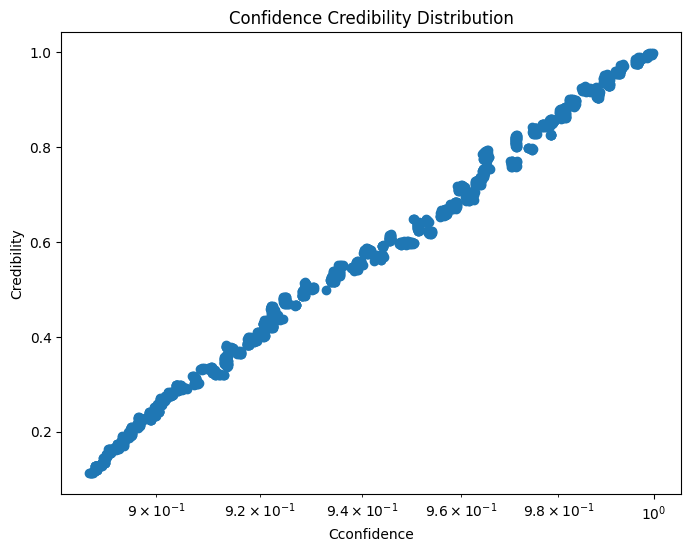

In [ ]:


# Plot credibility
plt.figure(figsize=(8, 6))
plt.scatter(confidence,credibility)
plt.xscale("log")

plt.xlabel('Cconfidence')
plt.ylabel('Credibility')
plt.title('Confidence Credibility Distribution')
plt.show()